<center> 
    <h1> GANs &#119070; &nbsp;Reels </h1>
</center>

## Demo ##

This notebook showcases our entire process of creating music using a Neural Network. At a high level, there are three main parts to our process of using a GAN to generate music. Namely:
1. Encoding: 
    Converting our dataset of Irish music to a form suitable for the GAN.
2. Training: 
    Feeding the curated data to our customized GAN, and decoding the results.
3. Decoding: 
    Converting the results from our GAN to music 

### 1. Encoding ###

This process can be broken down to 4 stages:
1. Sourcing: Getting the dataset from TheSessions.org/
2. Filtering: Pruning data that isn't in our relevant structure 
3. Cleaning: Using a structured notation to simplify ABC notation
4. Vectorizing: Creating vectors out of the cleaned data


Folder "../Data" already exists. Skipping creation...
Folder "../Data/Clean/" already exists. Skipping creation...
Folder "../Data/Statistics/" already exists. Skipping creation...
Folder "../Data/Vectors/" already exists. Skipping creation...
Starting abc cleaning...
10675/31093 tunes successfully cleaned!




Finished cleaning abc strings.
Starting vectorization process.
Creating dataframe...
Size of Initial Frame: 10675
Size of Cleaned Frame: 6142

 - - - - - - - Table Data - - - - - - - 

0    [[64, 64, 64, 64, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...
1    [[71, 71, 71, 71, 68, 68, 71, 71, 71, 71, 71, ...
2    [[66, 66, 64, 64, -5, -5, -5, -5, -5, -5, -5, ...
3    [[83, 83, 81, 81, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...
4    [[62, 62, 62, 62, 62, 62, 57, 57, 59, 59, 57, ...
Name: notes, dtype: object
 
Random Tune Sample 


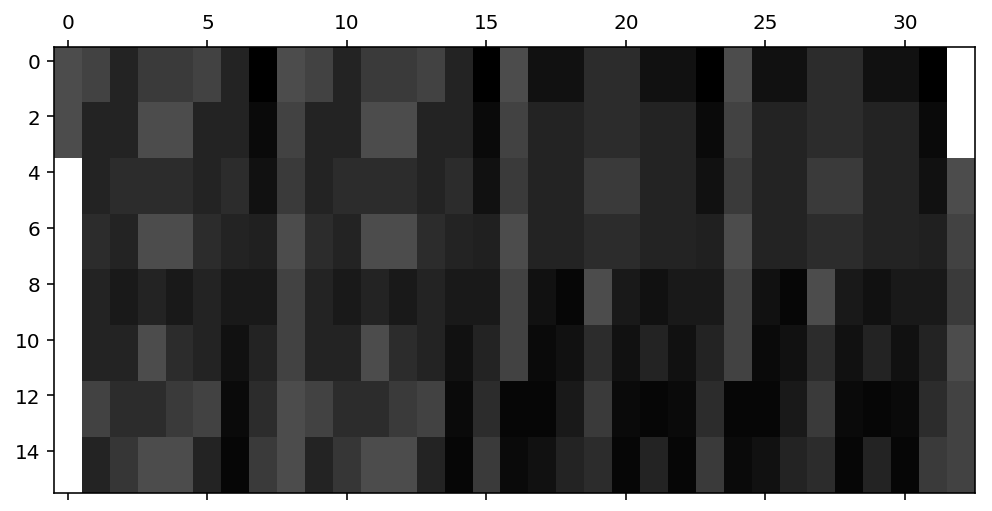

 
finished entire process


In [3]:
# Entire Encoding Process
%matplotlib inline
from src.Generation import raw_to_npy as raw_data
raw_data.raw_abc_to_npy_file(update=False)

### 2. Training ###

Our next step is to feed this curated data to our neural network. We opted for a Deconvolutional GAN since they are renowned for performing well on images, and making training a lot more stable. The parameters used were:
- Stride: 2
- Output function: Sigmoid
- Padding: 4 x 4 x 16
- Batch Size: 60

At a high level, this process consists of:
1. Building a Generator and a Discriminator
2. Padding and transposing data to suit our GAN
3. Checking for mode collapse every fixed number of iterations
4. Converting output of the GAN to a Vectorized array

Since training a Generative Adversarial Network takes a lot of computing power, we trained ours using Google Colab [found here](https://github.com/vin-nag/GANs-n-reels/blob/master/src/Model/MusicGAN.ipynb)

#### Using the Generated GAN ####

Once we trained our network, we use it to generate music

In [10]:
import keras
trained_GAN = keras.models.load_model("../src/Model/Trained/generator.h5")

C:\Users\Vineel\Desktop\term\lib\site-packages\keras\engine\saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [11]:
import numpy as np
noise = np.random.normal(0, 1, [1, 100]) #20 arrays of noise of shape [100,]
generated_samples = trained_GAN.predict(noise)

In [12]:
generated_samples = generated_samples[:,:-1, 4:-4]
generated_samples = np.squeeze(generated_samples, axis=3) #Remove colour channel
generated_samples = generated_samples.reshape([-1, 16, 16])

In [13]:
MAX_PITCH = 80
MIN_PITCH = 53
MID_PITCH = (MAX_PITCH + MIN_PITCH) / 2
RANGE = MAX_PITCH - MIN_PITCH

#Map from [-1, 1] to [MIN_PITCH, MAX_PITCH]
generated_samples = (RANGE * generated_samples) + MID_PITCH

#Make values discrete
generated_samples = generated_samples.astype(np.int32)

### 3. Decoding ###

After the training is done, we decode the resulting vector (provided the GAN didn't collapse) back to music, using essentially the inverse of our encoding process.

This consists of:
1. Converting Vectors to ABC Notation
2. Converting ABC Notation to a format readable by a Music Player

Decoder Object Created
Loading Vector Results from GAN...
 
Selected Vector Generated
[[53 54 58 58 58 58 59 59 71 71 71 70 70 70 75 76]
 [77 77 84 84 78 78 81 81 78 78 75 75 72 72 71 71]
 [63 63 66 65 69 70 63 63 77 78 67 66 64 62 66 66]
 [65 66 70 70 72 73 71 73 79 80 67 69 62 59 61 58]
 [54 53 59 58 58 58 59 59 71 71 70 70 70 70 75 75]
 [77 77 84 84 78 78 81 81 77 78 75 75 72 71 79 78]
 [87 88 87 86 83 84 86 86 84 84 88 89 84 84 85 84]
 [86 85 79 81 70 70 80 81 71 72 70 68 67 67 61 61]
 [54 54 59 58 58 58 59 59 71 71 71 70 70 69 75 75]
 [77 77 84 84 78 78 81 81 77 78 75 75 72 71 72 71]
 [63 64 66 64 67 69 64 65 76 76 67 67 63 63 66 66]
 [65 64 70 71 72 73 72 72 81 81 69 68 60 60 56 56]
 [54 54 59 59 58 58 58 58 71 71 71 71 69 69 76 75]
 [77 76 84 84 79 79 81 81 77 77 74 75 72 72 76 76]
 [80 82 87 86 85 85 86 86 84 82 87 87 88 88 81 83]
 [87 87 82 79 79 80 81 80 77 75 72 71 74 76 76 80]]
 
Image of the Vector


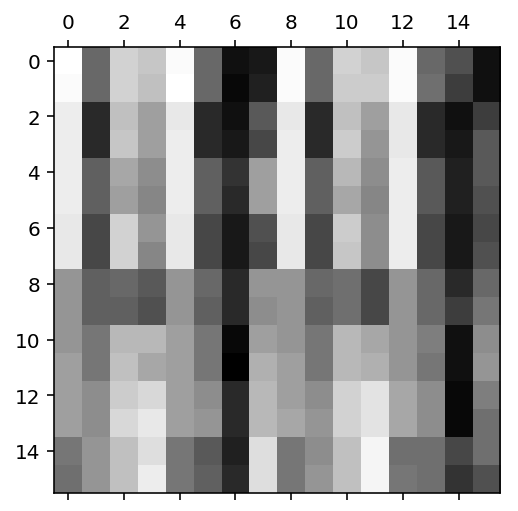

Decoding Vectors to ABC format...
 
ABC Notation Generated
F,2^F,^A,4B,2B3^A3^def2c'2^f2a2^f2^d2c2B2^D2^FFA^A^D2f^fG^FED^F2F^F^A2c^cB^cg^gGADB,^C^A,^F,F,B,^A,3B,2B2^A4^d2f2c'2^f2a2f^f^d2cBg^f^d'e'^d'd'bc'd'2c'2e'f'c'2^c'c'd'^c'ga^A2^gaBc^A^GG2^C2^F,2B,^A,3B,2B3^A2A^d2f2c'2^f2a2f^f^d2cBcB^DE^FEGAEFe2G2^D2^F2FE^ABc^cc2a2A^GC2^G,2^F,2B,2^A,4B4A2e^dfec'2g2a2f2d^dc2e2^g^a^d'd'^c'2d'2c'^a^d'2e'2ab^d'2^ag2^ga^gf^dcBde2
 


In [15]:
%matplotlib inline
# Decoding Process
# import matplotlib as plt
from src.Generation.Vectorizing import Decoding

decoder = Decoding.Decoder(presentation=True)

generated = Decoding.decode_single_vector_no_file(generated_samples, presentation=True)
decoder.play(generated[0] + 'z32')

Loading Vector Results from GAN...
 
Selected Vector Generated
[[52 55 67 67 66 66 67 68 64 64 56 56 46 46 53 54]
 [63 62 63 64 69 69 61 61 59 60 57 56 58 58 57 57]
 [55 55 63 63 61 60 64 64 69 69 66 66 57 57 56 57]
 [54 55 67 66 69 69 70 70 65 64 67 65 74 74 69 71]
 [55 54 67 68 65 66 67 67 64 63 56 55 46 46 53 53]
 [63 63 63 63 69 70 61 61 60 58 56 57 58 58 57 58]
 [55 55 62 63 61 61 63 64 69 70 66 65 56 57 56 57]
 [53 53 66 65 70 70 69 68 64 63 66 67 73 73 72 72]
 [81 83 74 74 62 64 71 73 59 60 62 61 67 66 74 74]
 [72 73 78 78 74 74 75 77 86 85 77 77 82 83 83 82]
 [80 80 79 79 76 76 68 67 49 49 53 53 56 56 67 66]
 [68 68 59 58 54 54 62 60 60 59 58 58 65 64 72 71]
 [83 84 75 76 64 65 72 73 59 60 62 62 68 68 74 74]
 [71 73 78 78 75 74 76 77 85 85 78 77 82 82 83 81]
 [80 79 81 80 75 75 68 67 49 49 53 54 56 56 67 67]
 [67 66 59 59 55 55 62 62 59 60 58 59 59 61 60 57]]
 
Image of the Vector


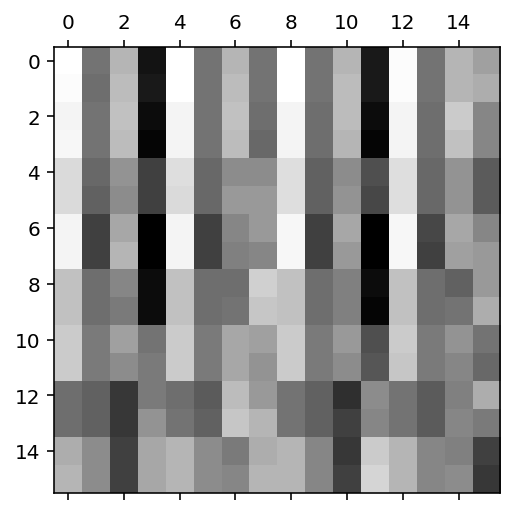

Decoding Vectors to ABC format...
 
ABC Notation Generated
E,2G,G2^F2G^GE2^G,2^A,,2F,^F,^DD^DEA2^C2B,CA,^G,^A,2A,2G,2^D2^CCE2A2^F2A,2^G,A,^F,G,G^FA2^A2FEGFd2ABG,^F,G^GF^FG2E^D^G,G,^A,,2F,2^D4A^A^C2C^A,^G,A,^A,2A,^A,G,2D^D^C2^DEA^A^FF^G,A,^G,A,F,2^FF^A2A^GE^D^FG^c2c2abd2DEB^cB,CD^CG^Fd2c^c^f2d2^dfd'^c'f2^ab2^a^g2g2e2^GG^C,2F,2^G,2G^F^G2B,^A,^F,2DC2B,^A,2FEcBbc'^deEFc^cB,CD2^G2d2B^c^f2^ddef^c'2^ff^a2ba^gga^g^d2^GG^C,2F,^F,^G,2G3^FB,2G,2D2B,C^A,B,2^CC
 


In [9]:
# An interesting tune generated earlier
num = 7

generated = Decoding.decode_single_vector('generated_samples.npy', num, presentation=True)
decoder.play(generated[num] + 'z32')